# Homework 3: Conditions, loops, and functions
ENVR 890-010: Python for Environmental Research, Fall 2020

By Rosa Cuppari. Material adapted from Andrew Hamilton and Greg Characklis. 

### Instructions
For this assignment, we will build a model simulating the operation of a simple reservoir, building off the ideas presented in the decision tree in class. This time, we have a slightly more complex reservoir operations model. 

**Due date: Sep. 4, before class**

Our simulation model will work as follows over the course of 365 days (see next cell for a visual representation) and is based on a simple mass balance model: water stored (S) during a given day is equal to the water stored the day before plus any inflows (i) minus water released to meet demands (q) and minus water spilled because the reservoir was too full (w). To simulate this, we will: 
1. Measure the water stored in the reservoir at time t-1 ($S_{t-1}$) and forecast inflows at time t ($i_t$)
1. If $S_{t-1}$+$i_t$ is greater than the maximum storage capacity, then spill the difference
    1. Forecast demand for water at time t ($q_t$) based on the season 
    1. If $q_t$ is less than or equal to $S_t$ (which is equal to the lesser of maximum capacity or $S_{t-1}$+$i_t$), release $q_t$ and
    1. Else, release $S_t$
    1. Update $S_t$ to reflect any water released to meet demands
1. Else, don't spill water 
    1. Forecast demand for water at time t ($q_t$) based on the season 
    1. If $q_t$ is less than or equal to $S_t$, release $q_t$ and
    1. Else, release $S_t$
    1. Update $S_t$ to reflect any water released to meet demands

Assume our reservoir is full at the start of our for loop. At each iteration, storage ($S_t$) is equal to storage in the previous step ($S_(t-1)$) plus inflows ($i_t$) minus releases ($q_t$) and spill ($w_t$). We know that the reservoir has a maximum storage capacity of 5000 acre-feet. We also know that how much water is being demanded during each day. Demand will be a random number between 500 and 2500 acre-feet, and inflows will similarly vary. 

I will set the starting variables, import modules, and create a skeleton for the function. **Your job will be to create a function that can take the starting amount of storage, iterations (how many days to run the loop for), and inputs of inflow and demand and return a dataframe with each iteration's storage level, spills, and releases. The for loop should also print a statment whenever demand is greater than storage, indicating during which iteration this happens. All incomplete blocks are referenced with "## TODO".**

**Don't forget to save a new copy of this notebook with your last name, and resave when you are finished.**

<img src="lec3_reservoir.jpg" style="width: 700px;" />

### Set up
First we need to make sure our notebook is working from the proper "working directory", and create a folder to hold our output. We also need to import the modules we need: in this case, os so that we can change our working directory and pandas so that we can write our output csv file.

In [1]:
import os
import pandas as pd
import numpy as np 

wd = os.getcwd()
print(wd) 

C:\Users\rcuppari\OneDrive - University of North Carolina at Chapel Hill\Teaching\Python-For-Environmental-Research\HW3_FunctionsLoops


In [2]:
# ##:  if wd is not where you want it to be (the location of this notebook), you can set it 
# wd = 'your_wd_here'
# os.chdir(wd)

In [3]:
# ## Create a directory to hold your output file
#os.makedirs(wd + '/output/', exist_ok = True)

TypeError: makedirs() got an unexpected keyword argument 'exist_ok'

In [16]:
# Now we set up the known parameters: storage maximum and storage at the start
max_capacity = 5000
S0=5000

# ## set number of days
days=365

In [38]:
# ## create lists to hold information that we want our function to save 
storage_levels=[]
# ## set the first row of the storage levels dataframe = to starting storage
storage_levels=[S0]
print(storage_levels[0])
# ## create a list called "daily_releases" and "daily_spill"
daily_releases=[]
daily_spill=[]

5000


In [35]:
# also read in our demand and inflow datasets
demand=list(pd.read_csv("demand.csv")['demand'].values)
print(demand[0:10])
print()

inflow=list(pd.read_csv('inflow.csv')['inflow'].values)
print(inflow[0:10])

[1539.7082637324688, 1344.9745764657264, 1081.1928982802742, 749.3915264964136, 899.9186483559932, 354.33837262121745, 1463.291339336675, 341.52932481576875, 1092.6346829688773, 762.1466319653191]
()
[1982.081392504605, 1687.1075858778727, 2491.4431064813252, 1180.6891304054325, 1389.0077319009165, 2494.991939389524, 1773.363712447362, 1635.8737764373868, 1769.4175378395125, 2112.83562445372]


In [47]:
# ## set up a function that will perform the for loop:
def reservoir_loop(iterations,storage_levels,demand,inflow,daily_releases):
    for i in range(1,iterations+1):## complete this statement:
        demand_i=demand[i-1]
        inflow_i=inflow[i-1]
        
        if (storage_levels[i-1]+inflow_i)>max_capacity:
            daily_spill.append((storage_levels[i-1]+inflow_i)-max_capacity )
            temp_storage=max_capacity 
        else: 
            temp_storage=storage_levels[i-1]+inflow_i
            
        if demand_i<=temp_storage: 
            daily_releases.append(demand_i)
            print('storage is sufficient for demand in day '+str(i)+', huzzah!')
        else: 
            daily_releases.append(temp_storage)
            # really it would have made more sense to print when demand was not met so it would be more clear :) 
            print('SOS, demand exceeds storage in day '+str(i)+' :(')
        
        storage_levels.append(temp_storage-daily_releases[i-1])
    return storage_levels, daily_releases

In [48]:
# ## run your function 
storage_df,releases_df=reservoir_loop(days,storage_levels,demand,inflow,daily_releases)

storage is sufficient for demand in day 1, huzzah!
storage is sufficient for demand in day 2, huzzah!
storage is sufficient for demand in day 3, huzzah!
storage is sufficient for demand in day 4, huzzah!
storage is sufficient for demand in day 5, huzzah!
storage is sufficient for demand in day 6, huzzah!
storage is sufficient for demand in day 7, huzzah!
storage is sufficient for demand in day 8, huzzah!
storage is sufficient for demand in day 9, huzzah!
storage is sufficient for demand in day 10, huzzah!
storage is sufficient for demand in day 11, huzzah!
storage is sufficient for demand in day 12, huzzah!
storage is sufficient for demand in day 13, huzzah!
storage is sufficient for demand in day 14, huzzah!
storage is sufficient for demand in day 15, huzzah!
storage is sufficient for demand in day 16, huzzah!
storage is sufficient for demand in day 17, huzzah!
storage is sufficient for demand in day 18, huzzah!
storage is sufficient for demand in day 19, huzzah!
storage is sufficient

In [43]:
## NOTE: I "storage_df" is a different name than "storage_levels" -- 
## how do we save the function output with the name storage_df?

## NOTE: we will learn how to write to a csv later - for now just check that it saved correctly
pd.DataFrame(storage_df).to_csv("output/storage_df.csv") ##add your last name 
pd.DataFrame(releases_df).to_csv("output/releases_df.csv") ##add your last name 

In [54]:
# ## Bonus coding experiments: do your results change if you start with a lower storage level? 
# ##What about if the maximum capacity is lower?
# run the function with S0 as < 5000: 
max_capacity = 1500
storage_levels=[max_capacity]
daily_releases=[]
daily_spill=[]
storage_df, releases_df=reservoir_loop(days,storage_levels,demand,inflow,daily_releases)


SOS, demand exceeds storage in day 1 :(
storage is sufficient for demand in day 2, huzzah!
storage is sufficient for demand in day 3, huzzah!
storage is sufficient for demand in day 4, huzzah!
storage is sufficient for demand in day 5, huzzah!
storage is sufficient for demand in day 6, huzzah!
storage is sufficient for demand in day 7, huzzah!
storage is sufficient for demand in day 8, huzzah!
storage is sufficient for demand in day 9, huzzah!
storage is sufficient for demand in day 10, huzzah!
storage is sufficient for demand in day 11, huzzah!
storage is sufficient for demand in day 12, huzzah!
SOS, demand exceeds storage in day 13 :(
storage is sufficient for demand in day 14, huzzah!
storage is sufficient for demand in day 15, huzzah!
storage is sufficient for demand in day 16, huzzah!
storage is sufficient for demand in day 17, huzzah!
storage is sufficient for demand in day 18, huzzah!
storage is sufficient for demand in day 19, huzzah!
storage is sufficient for demand in day 20,

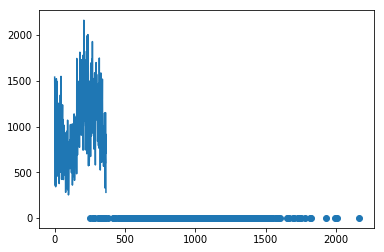

In [57]:
# ##How important are the changes in demand/inflows by season (1 = winter, 2 = spring, etc.)? 
# ##you can read in seasons as a new list: 
season=list(pd.read_csv("demand.csv")['season'].values)
import matplotlib.pyplot as plt
plt.scatter(demand,season)

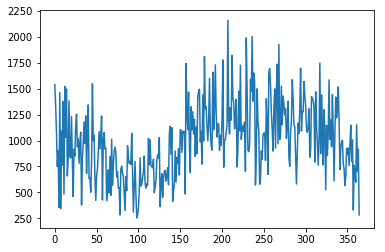

In [58]:
plt.plot(demand)